In [ ]:
import os

import tensorflow as tf

from data_generator import DataSet, show_grid_images, one_hot_tensor_to_label, labels_to_images

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

%matplotlib inline

In [2]:
labels_dir = os.path.join("gtCoarse", "train", "*", "*_labelIds.png")
images_dir = os.path.join("leftImg8bit", "train", "*", "*_leftImg8bit.png")
n_classes = 34
image_size = (640, 320)


In [3]:
dataset = DataSet(batch_size=3, images_dir=images_dir, labels_dir=labels_dir, n_classes=n_classes)

2975 images found in directory leftImg8bit/train


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


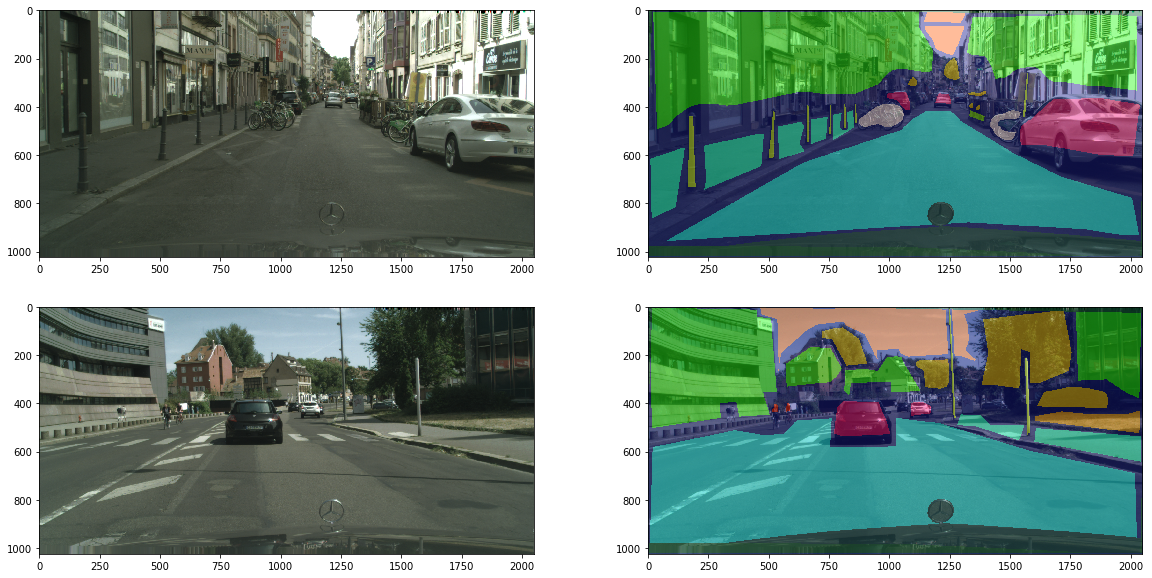

In [4]:
dataset.show_random_samples(2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


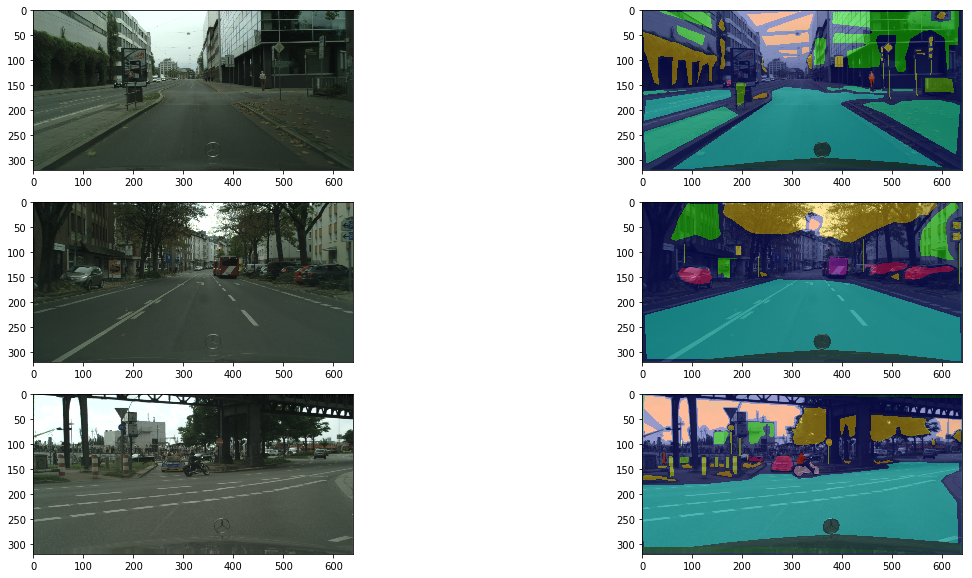

In [9]:
train_generator = dataset.generate_data(image_size=image_size, shuffle=True)
x, y = next(train_generator)
labeled_image = labels_to_images(x, one_hot_tensor_to_label(y), n_classes)
show_grid_images([x, labeled_image])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


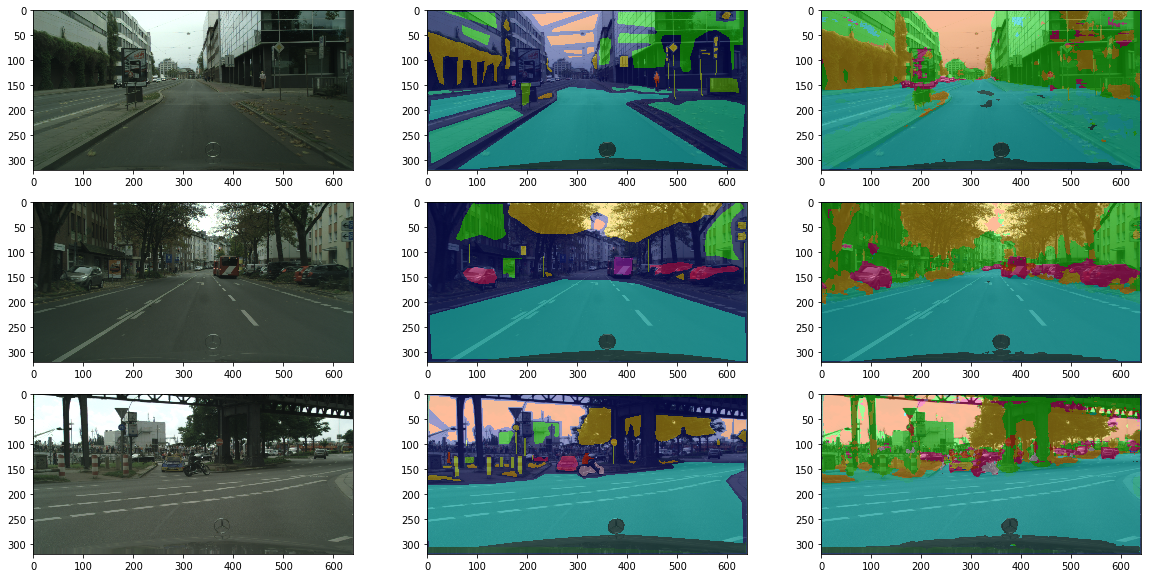

In [29]:
import cv2
from keras.models import load_model
from utils import create_inference_model

# model = load_model('model.h5')
model = create_inference_model('model.h5')
res = model.predict(x)
y_labeled_image = labels_to_images(x, one_hot_tensor_to_label(y), n_classes)

res_resized = [cv2.resize(res_label, image_size, interpolation=cv2.INTER_NEAREST) for
               res_label in res]
res_images = labels_to_images(x, res_resized, n_classes)

show_grid_images([x, y_labeled_image, res_images])

In [2]:
%run -i 'test_network.py'

ERROR:root:File `'test_network.py'` not found.
